# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [43]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,473,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196
1,163,85,40,72,139,59,5,132,50,18,135,159,260,150,68,3,9,191,195
2,224,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
3,209,101,56,100,168,55,11,214,31,24,175,219,681,224,74,2,3,185,192
4,405,88,40,73,173,68,7,150,44,19,137,174,341,151,69,2,20,196,200
5,86,89,41,84,141,58,9,149,45,19,145,172,330,162,72,4,18,188,200
6,502,86,36,66,128,57,8,131,52,18,127,148,252,139,76,5,27,183,187
7,315,93,40,62,117,49,7,131,52,18,145,160,249,156,78,8,6,184,184
8,310,90,50,90,188,61,10,181,36,21,158,211,492,220,69,6,19,191,199
9,254,93,47,85,161,65,12,155,43,19,157,179,354,178,76,2,9,184,196


Methods `describe` and `info` deliver some useful information.

In [44]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,415.582878,93.918033,44.972678,82.025501,169.229508,61.763206,8.546448,169.420765,40.819672,20.630237,148.289617,189.061931,443.269581,175.391621,72.663024,6.249545,12.708561,188.972678,195.582878
std,248.575509,8.278381,6.257345,15.952807,33.919104,8.246346,4.734573,33.745067,7.860456,2.631206,14.762286,32.053613,179.866131,32.758539,7.794657,4.903971,8.807073,6.322043,7.555812
min,0.000000,73.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,197.000000,88.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,411.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,175.000000,72.000000,5.000000,11.000000,189.000000,197.000000
75%,638.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,597.000000,200.000000,76.000000,9.000000,19.000000,194.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [45]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 2.0.1. Remove unnecessary feature
The first feature is simply the number of object in set, of course we don't need this in our classificator.

In [46]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

##### 2.0.2. Remove strongly correlated features
Because we want to use logistic regression (which based on linear regression, we remember about some problems that gives us the correlated features - can cause overfitting and instability). So, let's check the correlation of features.

Text(0.5, 1.0, 'Correlation')

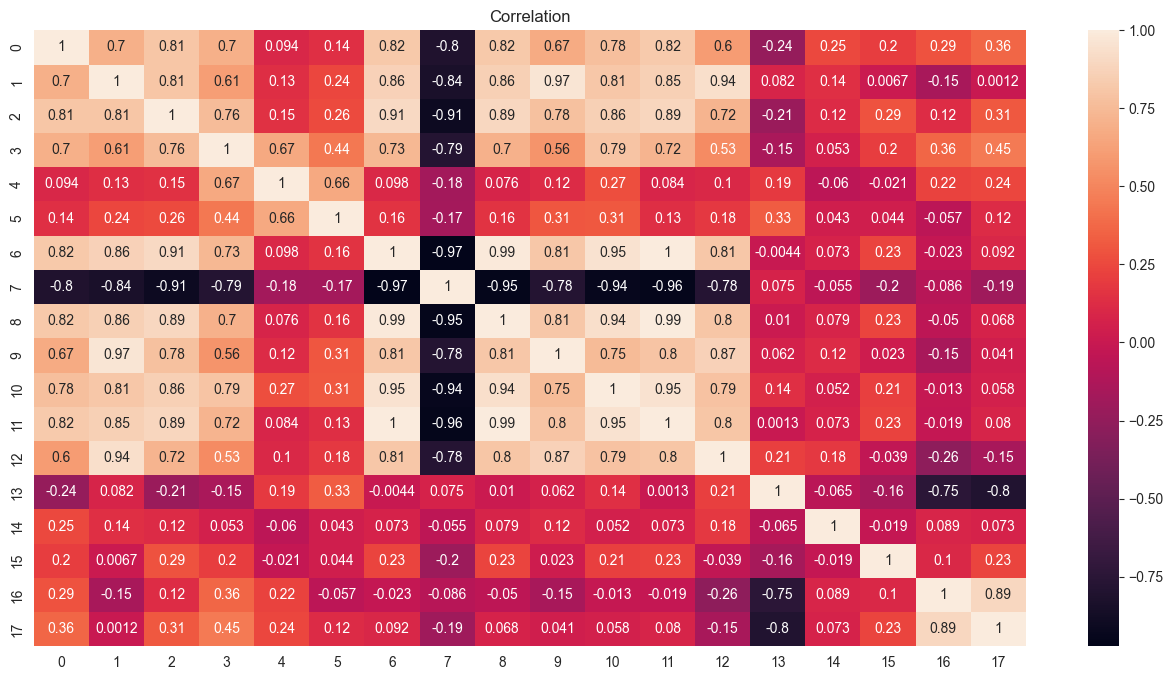

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

Let's choose the most correlated features and drop them from our dataset.

In [48]:
threshold = 0.92

corr_matrix = pd.DataFrame(X_train).corr().abs()
upper_tr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
dropped = [column for column in upper_tr.columns if any(upper_tr[column] > threshold)]

X_train = pd.DataFrame(X_train).drop(dropped, axis=1, inplace=False)
X_test = pd.DataFrame(X_test).drop(dropped, axis=1, inplace=False)

Text(0.5, 1.0, 'Correlation')

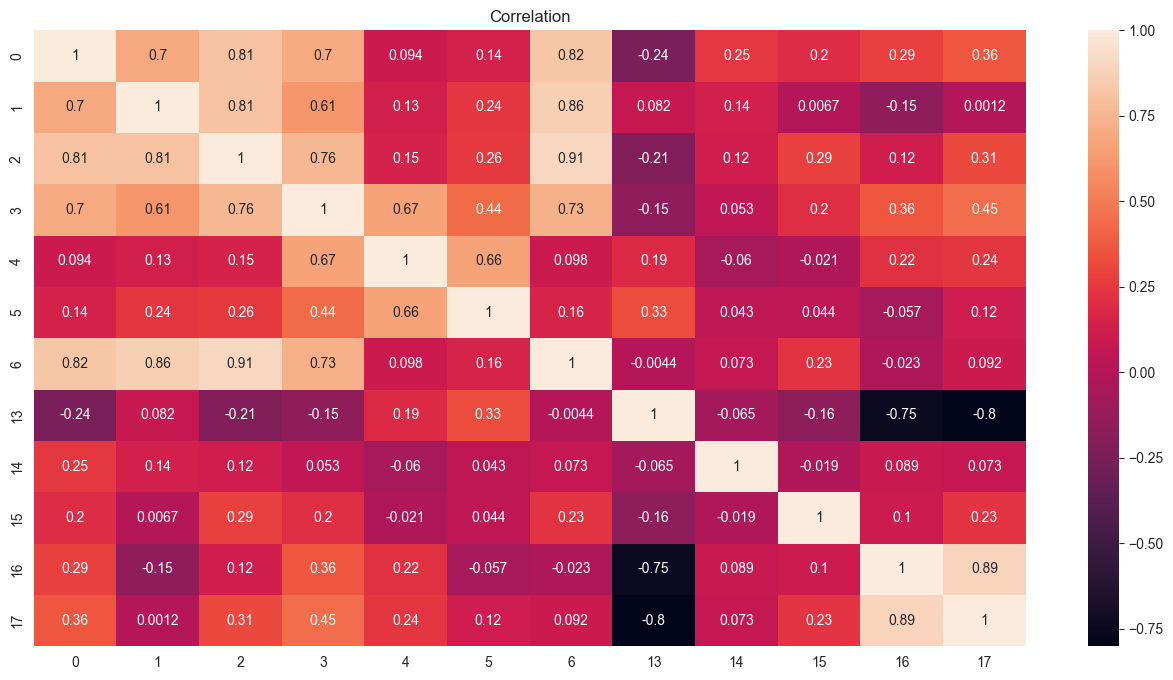

In [49]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

##### 2.0.3. Removing outliers
Below we will use logistic regression with MSE, so MSE is quite sensitive about outliers. To get better classifier we need to drop outliers.

In [50]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [51]:
# create mask
mask = yhat != -1

In [53]:
# remove all rows that are outliers
X_train, y_train = X_train.to_numpy()[mask, :], y_train[mask]

In [54]:
(X_train.shape, y_train.shape)

((539, 12), (539,))

##### 2.0.4. Normalization
Because we will be using logistic regression classificator, we need to normalize our dataset (in order to avoid gradient explosion).

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02
mean,7.876610e-16,1.450087e-16,6.591306e-18,-2.109218e-16,3.460435e-16,-2.043305e-16,-7.580001e-17,1.100748e-15,2.142174e-17,8.239132e-17,2.636522e-17,-1.436905e-15
std,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00
min,-2.533514e+00,-1.904576e+00,-2.626574e+00,-1.813262e+00,-2.490993e+00,-2.807187e+00,-1.714655e+00,-1.892346e+00,-1.270775e+00,-1.441453e+00,-2.070806e+00,-1.828289e+00
25%,-7.145405e-01,-7.838702e-01,-7.468794e-01,-8.706337e-01,-7.257482e-01,-9.759328e-01,-6.920782e-01,-8.021304e-01,-8.642781e-01,-7.605211e-01,-8.042365e-01,-6.294475e-01
50%,-1.082160e-01,-1.434670e-01,-1.829709e-01,-5.368957e-02,-1.965022e-02,-6.030568e-02,-3.612444e-01,-1.791502e-01,-2.545322e-01,-1.930780e-01,-1.263045e-02,1.697803e-01
75%,7.406383e-01,8.171379e-01,1.007503e+00,8.575174e-01,6.864477e-01,8.553215e-01,9.019392e-01,4.438301e-01,5.584624e-01,7.148309e-01,7.789756e-01,7.025989e-01
max,3.044671e+00,2.097944e+00,1.884694e+00,2.082934e+00,2.628217e+00,6.349084e+00,2.886942e+00,2.780006e+00,3.200695e+00,3.211581e+00,2.362188e+00,2.034645e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight' : ['balanced', None],
    'penalty' : ['l1', 'l2', None, 'elasticnet'],
    'C' : [0.5, 1.0, 1.5]
}
grid_cv = GridSearchCV(logreg, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=5, refit=False)
grid_cv.fit(X_train, y_train)

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_rati

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.5, 1.0, 1.5],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', None, 'elasticnet']},
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [67]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.7320492614824197 accuracy: 0.742159916926272 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l1'}
f1_weighted: 0.7295482618663625 accuracy: 0.7384389061959155 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2'}
f1_weighted: 0.7486187696648432 accuracy: 0.7532537210107304 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': None}
f1_weighted: nan accuracy: nan 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
f1_weighted: 0.7336091221988431 accuracy: 0.7421945309795777 
params: {'C': 0.5, 'class_weight': None, 'penalty': 'l1'}
f1_weighted: 0.7178115562106805 accuracy: 0.7273104880581516 
params: {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}
f1_weighted: 0.7491826162792228 accuracy: 0.7532537210107304 
params: {'C': 0.5, 'class_weight': None, 'penalty': None}
f1_weighted: nan accuracy: nan 
params: {'C': 0.5, 'class_weight': None, 'penalty': 'elasticnet'}
f1_weighted: 0.72911586747787 accuracy: 0.7384215991692626 
p

In [68]:
best_params_lr = {'C': 1.5, 'class_weight': None, 'penalty': 'l2'}
logreg.set_params(**best_params_lr)

LogisticRegression(C=1.5, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [69]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

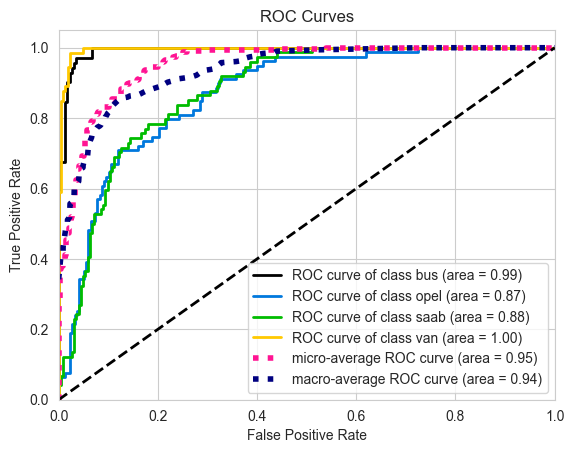

In [70]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE